# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
response = requests.get(btc_url).json()
btc_price=response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response = requests.get(eth_url).json()
eth_price=response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = (my_btc * btc_price)
my_eth_value = (my_eth * eth_price)
                      
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24668.40
The current value of your 5.3 ETH is $6365.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                             open    high    low   close   volume trade_count   
timestamp                                                                       
2022-07-15 04:00:00+00:00  101.94  102.35  101.9  102.25  8440151       27300   

                                          SPY                          \
                                 vwap    open    high     low   close   
timestamp                                                               
2022-07-15 04:00:00+00:00  102.214854  382.62  385.25  380.54  385.13   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-07-15 04:00:00+00:00  79318992      488124  383.334989

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'].values[0]
spy_close_price = df_portfolio['SPY']['close'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.25
Current SPY closing price: $385.13


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19256.50
The current value of your 200 AGG shares is $20450.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({"amount":[total_crypto_value, total_shares_value]}, index = ["crypto","shares"])
 
# Display savings DataFrame
display(df_savings)

,amount
crypto,31033.488
shares,39706.500


<AxesSubplot:ylabel='amount'>

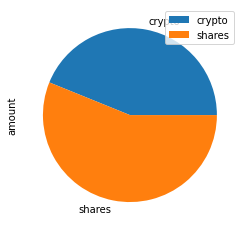

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough money in your fund")
elif total_savings == emergency_fund:
    print("Congratulations, you reached a financial goal! you now have enough money in your fund")
elif total_savings < emergency_fund:
    missing_money = emergency_fund-total_savings
    print(f"You are almost there!, you need another ${missing_money:0.2f} in your savings")


Congratulations, you have enough money in your fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/itzikfeldman/fintech_bootcamp/Assignments/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004848,1.004639,0.996479,1.000064,1.002771,0.998626,1.009091,1.014504,0.998111,1.010274,...,0.995240,0.995395,1.002723,1.000189,0.997266,1.014578,1.017163,1.007199,1.006570,0.997552
2,1.017591,1.012758,1.001238,1.003366,1.011972,0.998987,1.009405,1.020904,0.990246,1.010555,...,1.002359,0.991382,1.010559,0.991823,0.996861,1.020275,1.011408,1.004089,1.011539,1.006195
3,1.020209,1.001934,0.993664,1.005675,1.019438,1.007185,1.009166,1.014394,0.987166,1.015145,...,1.000375,0.999922,1.004360,0.990444,1.010918,1.031476,1.005445,1.001777,0.999535,0.996955
4,1.015976,0.994009,0.984914,1.005584,1.019886,1.014486,1.001070,1.016582,0.991125,1.009917,...,0.989221,1.008168,1.002891,0.995691,1.006287,1.031878,1.006138,0.996456,0.991802,0.990081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.787118,24.549309,20.301214,32.795419,34.695651,39.564981,15.086959,13.605483,11.008865,3.301013,...,13.702306,9.525973,12.964308,17.057520,9.267499,14.951643,14.948943,38.005896,23.553119,6.728883
7557,13.734931,24.880342,20.250409,33.003760,35.113058,39.144457,15.232999,13.594314,11.127557,3.306575,...,13.849968,9.461664,12.855803,17.220658,9.407004,14.871536,14.672855,38.470773,23.742482,6.791895
7558,13.602586,24.885279,19.995999,32.978440,34.829610,39.069482,15.154426,13.747058,11.119400,3.343355,...,13.875984,9.419795,12.837191,17.277924,9.413700,14.934485,14.793403,38.090621,23.799113,6.837017
7559,13.465319,24.950860,20.223649,33.046397,34.958408,39.213633,15.011489,13.734045,11.178003,3.326178,...,14.025694,9.381142,13.021095,17.330154,9.381430,14.998652,14.999529,38.002072,23.599932,6.934103


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

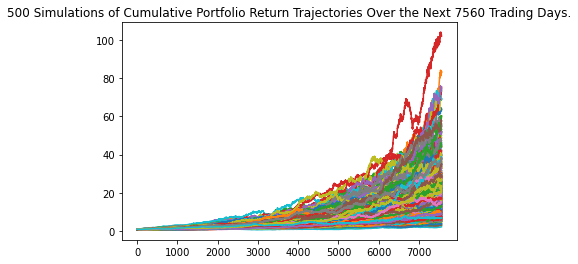

In [19]:
# Plot simulation outcomes
MC_thirty_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

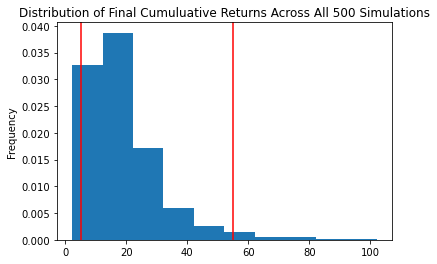

In [20]:
# Plot probability distribution and confidence intervals
MC_thirty_years.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_thirty = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_thirty)

count           500.000000
mean             19.149666
std              12.915679
min               2.272891
25%              10.372953
50%              15.836465
75%              23.965536
max             101.978727
95% CI Lower      5.170968
95% CI Upper     54.820372
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_thirty[8]*initial_investment,2)
ci_upper = round(tbl_thirty[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103419.36 and $1096407.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl_thirty[8]*initial_investment,2)
ci_upper = round(tbl_thirty[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $155129.04 and $1644611.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option - with 70% in stocks and 60K initial investment

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with more weight for stocks
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/itzikfeldman/fintech_bootcamp/Assignments/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003427,1.016766,1.001671,0.997997,0.999934,1.013114,0.999566,0.997721,0.993121,0.986887,...,1.005103,0.998025,1.007897,0.997149,1.009324,1.004771,0.982547,1.010371,0.993268,1.000144
2,1.013492,1.012748,0.995167,0.994187,0.996083,1.003575,0.999704,0.998312,0.988087,0.995859,...,1.009563,0.977896,1.016948,0.996350,1.013192,1.013239,0.991142,1.016693,0.993216,1.016471
3,1.023894,1.006566,0.997392,1.001927,0.991393,1.008689,1.005590,0.999589,0.973607,0.999739,...,0.996564,0.977682,1.013785,1.000568,1.017929,1.024867,0.983938,1.027529,1.000523,1.015585
4,1.021825,1.024452,1.002462,0.996790,0.977585,1.005063,1.001870,1.008910,0.987396,0.995458,...,1.008943,0.972812,1.010581,0.993601,1.008739,1.019521,0.992464,1.029507,0.999297,1.022522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.809112,2.357053,1.243904,2.235230,1.806078,1.744302,1.912373,1.839046,3.001939,1.923579,...,2.158507,1.901714,1.261311,2.527467,1.806178,2.283810,1.602930,1.796288,2.993322,1.740511
1257,1.809102,2.382234,1.243363,2.249613,1.816293,1.755902,1.911604,1.862659,3.048768,1.931787,...,2.157244,1.889865,1.270573,2.523400,1.797086,2.283404,1.604910,1.771722,2.926833,1.752158
1258,1.817086,2.368616,1.246355,2.248327,1.831596,1.765422,1.890671,1.900643,3.080698,1.944526,...,2.159186,1.871042,1.270278,2.492645,1.790235,2.275079,1.601707,1.766153,2.990330,1.742441
1259,1.825304,2.365378,1.240923,2.235060,1.853295,1.761656,1.898211,1.904359,3.068773,1.942683,...,2.162640,1.876984,1.269358,2.521180,1.799172,2.276305,1.597854,1.768164,3.031758,1.757264


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

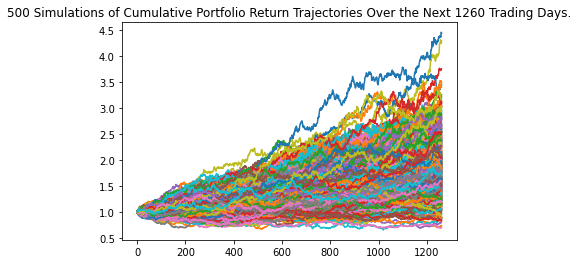

In [26]:
# Plot simulation outcomes
MC_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

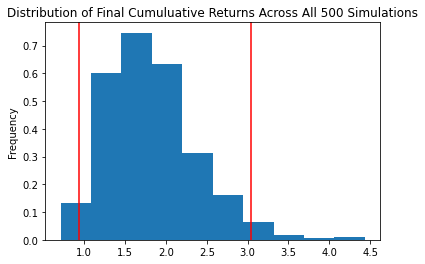

In [27]:
# Plot probability distribution and confidence intervals
MC_five_years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.824508
std               0.551451
min               0.709945
25%               1.419677
50%               1.760981
75%               2.102733
max               4.435329
95% CI Lower      0.940900
95% CI Upper      3.044726
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56453.98 and $182683.56


### Ten Years Retirement Option - 65% stocks and 60K initial investment

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.35,.65],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/itzikfeldman/fintech_bootcamp/Assignments/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005721,1.005839,0.998895,0.992581,1.011666,0.997630,1.003757,1.000483,1.004989,1.001411,...,0.995480,0.995844,0.993563,1.004393,1.006166,0.997141,0.998080,0.992657,1.011363,0.993780
2,0.996702,1.006204,0.999025,0.994733,1.009528,0.981820,1.012072,1.003862,1.007070,0.994869,...,0.999876,1.002342,0.991787,1.000727,0.994574,1.003320,1.000341,0.993071,1.015174,0.987470
3,0.998699,0.993744,0.981054,0.993927,1.016097,0.974626,0.999144,1.003766,1.020162,0.992426,...,0.998540,1.008842,0.989774,0.997083,1.002584,1.007585,0.992583,0.995585,1.011909,0.992023
4,0.996481,0.988989,0.976934,1.001125,1.022707,0.976467,0.998666,1.006098,1.011122,0.992890,...,0.992924,1.016729,1.004638,1.004671,1.001300,1.013707,0.990426,1.002650,1.023059,0.996935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.003140,4.385327,3.023073,1.721496,1.659036,2.671140,2.324795,2.458584,3.910043,1.275563,...,2.636888,2.049431,3.149510,1.013694,1.976111,4.738556,2.517758,1.904008,3.424764,2.272787
2517,2.026105,4.420955,3.009739,1.715395,1.659536,2.659039,2.318076,2.432168,3.899023,1.274739,...,2.627802,2.029856,3.138178,1.008378,1.974778,4.721361,2.543186,1.933773,3.430676,2.293211
2518,2.027144,4.379726,3.071971,1.746300,1.655097,2.636386,2.314595,2.424801,3.890166,1.282295,...,2.619070,2.020438,3.134829,1.013683,1.983769,4.700419,2.504680,1.935291,3.464443,2.295112
2519,2.046786,4.410101,3.145775,1.759480,1.669818,2.613470,2.312307,2.409397,3.956790,1.291290,...,2.650593,2.019261,3.148211,1.012901,1.984950,4.683971,2.503260,1.957897,3.432036,2.315998


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

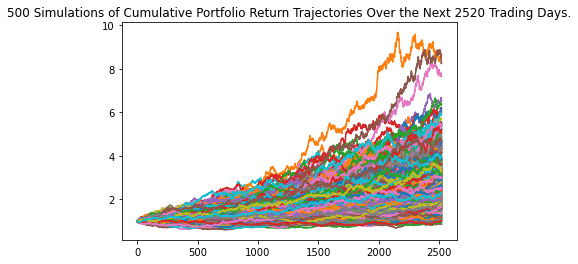

In [32]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

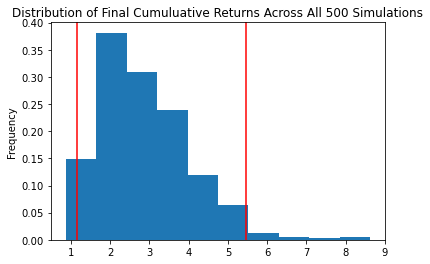

In [33]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.872171
std               1.186002
min               0.866673
25%               1.990599
50%               2.691435
75%               3.476152
max               8.625989
95% CI Lower      1.161471
95% CI Upper      5.461677
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69688.25 and $327700.64
